### Purpose of this notebook

Though it is not required in the requirements, it is easier to allow others to follow by giving a guidance of what the process of subsetting the hate.csv did. This notebook serve particularly to provide that guidance.

### Onboarding
We would use pandas to read the csv and perform the subset process.

In [31]:
import pandas as pd
original_hate = pd.read_csv("hate_crime.csv", low_memory=False)

In [32]:
original_hate

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,466130,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201399,466159,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S
201400,508677,2018,WV0540200,Vienna,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,Unknown,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,White,Unknown,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S


In [33]:
original_hate.shape

(201403, 28)

We could tell that the number of tuples in this dataset maybe too much for a browser to handle. Also, 28 columns means that some of the columns maybe irrelavant to our analysis.

Where, our focus of our analysis is shown below:
 - Explore the trend of frequency of hate crimes since 1991 (Line Plot, tooltip implemented for checking a value of a point)
 - Explore the types of hate crimes and race of offenders and reason of hate that are most common (Stacked Bar
    Graph, selection of offenders and victims done by a radio button, use mouseover to highlight the area that the user's mouse is on)
 - Explore the average count of offenders aggregated by city against the average counts of victims aggregated by city(Scatterplot)
 - Explore the count of the juvenile offenders and the regions when they commit the hate crime (Box Plot)
 - Explore how the race of the persecutor of a hate crime relates to the race of the victim of a hate crime (Heatmap)
 - Explore where hate crimes occur in the United States in a state level(Choropleth, use mouseover to highlight the area that the user's mouse is on)
 
Thus, we would need data on 
 - count of hate crime, year of hate crime
 - victim race, offender race, type of hate crime
 - age for the victims
 - age of the offenders, sex of the offenders
 - race of the persecutor, and race of the victim
 - state of hate crime

Thus, we would need
 - VICTIM_COUNT, DATA_YEAR
 - OFFENDER_RACE, VICTIM_RACE, OFFENSE_TYPE
 - PUB_AGENCY_NAME, VICTIM_COUNT, TOTAL_OFFENDER_COUNT
 - REGION_NAME, JUVENILE_OFFENDER_COUNT
 - OFFENDER_RACE, VICTIM_RACE
 - STATE_NAME

We would need to derive:
VICTIM_RACE, OFFENSE_TYPE

In [34]:
original_hate.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [35]:
original_hate.VICTIM_COUNT.value_counts().head()

1    170319
2     22979
3      4562
4      1853
5       659
Name: VICTIM_COUNT, dtype: int64

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='TOTAL_OFFENDER_COUNT'>

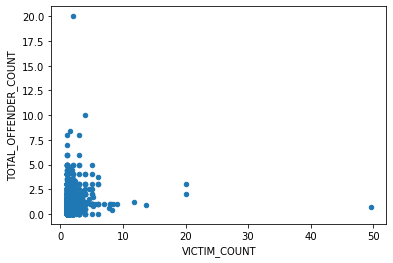

In [36]:
original_hate.groupby("PUB_AGENCY_NAME").mean().plot(kind="scatter", y="TOTAL_OFFENDER_COUNT", x = "VICTIM_COUNT")

<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='TOTAL_OFFENDER_COUNT'>

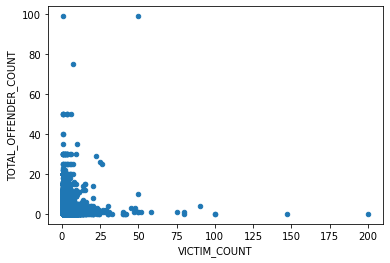

In [37]:
original_hate.plot.scatter(x="VICTIM_COUNT", y="TOTAL_OFFENDER_COUNT")

In [38]:
original_hate.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME', 'TOTAL_INDIVIDUAL_VICTIMS',
       'LOCATION_NAME', 'BIAS_DESC', 'VICTIM_TYPES', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

### Deriving Offense Type

In [39]:
original_hate["Offense"] = original_hate['OFFENSE_NAME'].str.split(";").str[0].str.split(" ").str[-1]

In [40]:
first3offense = list(original_hate["Offense"].value_counts()[0:3].index)
original_hate["Offense"][(original_hate["Offense"] != first3offense[0]) & 
              (original_hate["Offense"] != first3offense[1]) & 
              (original_hate["Offense"] != first3offense[2])] = "Others"

/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/2012499392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate["Offense"][(original_hate["Offense"] != first3offense[0]) &


In [41]:
first3offense

['Property', 'Assault', 'Intimidation']

In [42]:
original_hate.Offense.value_counts()

Property        64768
Assault         60837
Intimidation    59771
Others          16027
Name: Offense, dtype: int64

### Derviving VICTIM_RACE

In [43]:
# value counts of bias_desc

# original_hate['BIAS_DESC'].value_counts().to_string().split('\n')

In [44]:
# print value counts if contains 'Jewish'. proves there is no particular order to groups of bias aside from alphabetical order

# for i in original_hate['BIAS_DESC'].value_counts().to_string().split('\n'):
#     if 'Jewish' in i:
#         print(i)

In [45]:
# number of rows that contain groups of biases

len(original_hate[original_hate['BIAS_DESC'].str.contains(';')])

359

In [46]:
# total number of rows

len(original_hate)

201403

In [47]:
original_hate[original_hate['BIAS_DESC'].str.contains(';')==False]

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS,Offense
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S,Intimidation
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S,Assault
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,Assault
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S,Assault
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S,Assault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201398,466130,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S,Others
201399,466159,2018,WV0540100,Parkersburg,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Simple Assault,1.0,School/College,Anti-Black or African American,Individual,S,S,Assault
201400,508677,2018,WV0540200,Vienna,NaN,City,WV,West Virginia,South Atlantic,South,...,Unknown,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Asian,Individual,S,S,Intimidation
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,Unknown,1,Intimidation,2.0,Residence/Home,Anti-White,Law Enforcement Officer,S,S,Intimidation


In [48]:
original_hate["OFFENDER_RACE"][ 
              (original_hate["OFFENDER_RACE"] == "American Indian or Alaska Native") | 
              (original_hate["OFFENDER_RACE"] == "Native Hawaiian or Other Pacific Islander")] = "Others"

/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/1582282739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate["OFFENDER_RACE"][


In [49]:
original_hate["VICTIM_RACE"] = original_hate['BIAS_DESC']

In [50]:
original_hate.OFFENDER_RACE.unique()

array(['White', 'Black or African American', 'Unknown', 'Multiple',
       'Asian', 'Others', nan], dtype=object)

In [51]:
original_hate.VICTIM_RACE[original_hate.VICTIM_RACE.str.contains
              (original_hate.OFFENDER_RACE.unique()[0])] = original_hate.OFFENDER_RACE.unique()[0]
original_hate.VICTIM_RACE[original_hate.VICTIM_RACE.str.contains
              ("Black", case=False)] = original_hate.OFFENDER_RACE.unique()[1]
original_hate.VICTIM_RACE[original_hate.VICTIM_RACE.str.contains
              (original_hate.OFFENDER_RACE.unique()[4])] = original_hate.OFFENDER_RACE.unique()[4]

/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/1051357128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate.VICTIM_RACE[original_hate.VICTIM_RACE.str.contains
/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/1051357128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate.VICTIM_RACE[original_hate.VICTIM_RACE.str.contains
/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/1051357128.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

In [52]:
original_hate.VICTIM_RACE.value_counts()

Black or African American                                                          69209
Anti-Jewish                                                                        26109
White                                                                              23432
Anti-Gay (Male)                                                                    20316
Anti-Hispanic or Latino                                                            12837
                                                                                   ...  
Anti-Bisexual;Anti-Gay (Male)                                                          1
Anti-Islamic (Muslim);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)        1
Anti-Hispanic or Latino;Anti-Jewish                                                    1
Anti-Gay (Male);Anti-Physical Disability                                               1
Anti-Gay (Male);Anti-Male                                                              1
Name: VICTIM_RACE, Le

In [53]:
first4race = list(original_hate.VICTIM_RACE.value_counts()[0:8].index)
original_hate["VICTIM_RACE"][(original_hate["VICTIM_RACE"] != original_hate.OFFENDER_RACE.unique()[0]) & 
              (original_hate["VICTIM_RACE"] != original_hate.OFFENDER_RACE.unique()[1]) & 
              (original_hate["VICTIM_RACE"] != original_hate.OFFENDER_RACE.unique()[4])] = "Others"

/var/folders/51/64d5lv_53rx716ghj8z3q13c0000gn/T/ipykernel_5823/2123912314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original_hate["VICTIM_RACE"][(original_hate["VICTIM_RACE"] != original_hate.OFFENDER_RACE.unique()[0]) &


In [54]:
original_hate.OFFENDER_RACE.value_counts()

Unknown                      89284
White                        79514
Black or African American    25956
Multiple                      4047
Asian                         1453
Others                        1130
Name: OFFENDER_RACE, dtype: int64

In [55]:
original_hate.VICTIM_RACE.value_counts()

Others                       102840
Black or African American     69209
White                         23432
Asian                          5922
Name: VICTIM_RACE, dtype: int64

In [56]:
new_hate = original_hate[["STATE_NAME", "DATA_YEAR", "VICTIM_COUNT", "OFFENDER_RACE", 
                          "VICTIM_RACE", "Offense", "PUB_AGENCY_NAME", 
                          "TOTAL_OFFENDER_COUNT", "REGION_NAME", "JUVENILE_OFFENDER_COUNT"]].copy()

In [57]:
drop0 = new_hate[(new_hate["TOTAL_OFFENDER_COUNT"] != 0) & (new_hate["VICTIM_COUNT"] != 0) & 
                 (new_hate["OFFENDER_RACE"] != "Multiple") & (new_hate["OFFENDER_RACE"] != "Unknown")]
drop0

,STATE_NAME,DATA_YEAR,VICTIM_COUNT,OFFENDER_RACE,VICTIM_RACE,Offense,PUB_AGENCY_NAME,TOTAL_OFFENDER_COUNT,REGION_NAME,JUVENILE_OFFENDER_COUNT
0,Arkansas,1991,1,White,Black or African American,Intimidation,Rogers,1,South,NaN
1,Arkansas,1991,1,Black or African American,White,Assault,Hope,1,South,NaN
2,Arkansas,1991,1,Black or African American,Black or African American,Assault,Pine Bluff,1,South,NaN
3,Arkansas,1991,2,Black or African American,White,Assault,Pine Bluff,1,South,NaN
4,Arkansas,1991,1,Black or African American,White,Assault,Pine Bluff,1,South,NaN
...,...,...,...,...,...,...,...,...,...,...
201394,West Virginia,2018,1,White,White,Others,Buckhannon,1,South,0.0
201395,West Virginia,2018,1,White,White,Others,Buckhannon,1,South,0.0
201397,West Virginia,2018,1,White,Others,Others,Kenova,2,South,0.0
201399,West Virginia,2018,1,White,Black or African American,Assault,Parkersburg,1,South,1.0


In [58]:
drop0.VICTIM_RACE.value_counts()

Others                       47686
Black or African American    39330
White                        16272
Asian                         3247
Name: VICTIM_RACE, dtype: int64

In [129]:
drop_df = drop0[((drop0.VICTIM_RACE == "Others") & (drop0.DATA_YEAR != 2001)) | 
      ((drop0.OFFENDER_RACE == "Others") & (drop0.DATA_YEAR != 2001))].sample(20000,replace=False,random_state=30)
drop_df

,STATE_NAME,DATA_YEAR,VICTIM_COUNT,OFFENDER_RACE,VICTIM_RACE,Offense,PUB_AGENCY_NAME,TOTAL_OFFENDER_COUNT,REGION_NAME,JUVENILE_OFFENDER_COUNT
17989,Texas,1993,1,White,Others,Others,Tyler,3,South,NaN
64147,Oregon,1999,1,White,Others,Intimidation,Portland,1,West,NaN
6810,Maryland,1992,1,White,Others,Assault,Montgomery County Police Department,1,South,NaN
181795,California,2016,1,White,Others,Assault,Simi Valley,2,West,0.0
142597,South Carolina,2009,1,White,Others,Assault,Chester,1,South,NaN
...,...,...,...,...,...,...,...,...,...,...
49715,Arizona,1998,1,White,Others,Assault,Phoenix,1,West,NaN
169979,California,2014,2,White,Others,Intimidation,San Diego,1,West,0.0
5740,Idaho,1992,1,White,Others,Assault,Twin Falls,1,West,NaN
163345,California,2013,1,Black or African American,Others,Assault,Berkeley,1,West,0.0


In [130]:
drop_some_others = drop0.drop(
    axis=1, index=drop_df.index)

In [131]:
rename_col = drop_some_others.sample(n=int(original_hate.shape[0]/10), replace=False, ignore_index=True, 
                                     random_state=20)
rename_col

,STATE_NAME,DATA_YEAR,VICTIM_COUNT,OFFENDER_RACE,VICTIM_RACE,Offense,PUB_AGENCY_NAME,TOTAL_OFFENDER_COUNT,REGION_NAME,JUVENILE_OFFENDER_COUNT
0,Massachusetts,1998,1,Black or African American,White,Intimidation,Boston,1,Northeast,NaN
1,Washington,1994,2,White,Asian,Property,Pierce,2,West,NaN
2,Minnesota,2013,1,Black or African American,White,Assault,St. Paul,1,Midwest,0.0
3,Massachusetts,1993,1,White,Asian,Others,Fall River,1,Northeast,NaN
4,California,2003,1,White,Black or African American,Intimidation,Riverside,1,West,NaN
...,...,...,...,...,...,...,...,...,...,...
20135,Florida,1993,1,White,Black or African American,Assault,St. Johns,1,South,NaN
20136,Colorado,2003,1,White,Black or African American,Intimidation,Lakewood,1,West,NaN
20137,California,1997,1,White,Others,Assault,Vacaville,1,West,NaN
20138,California,1998,1,White,Asian,Intimidation,Los Angeles,1,West,NaN


In [132]:
final_hate = rename_col.rename(columns={"STATE_NAME":"State", "DATA_YEAR": "Year", "VICTIM_COUNT": "Victim_count", 
                           "OFFENDER_RACE": "Offender_race", "PUB_AGENCY_NAME": "City", 
                           "TOTAL_OFFENDER_COUNT": "Offender_count", "REGION_NAME": "Region",
                           "JUVENILE_OFFENDER_COUNT": "Juvenile_Offeneder_Count", "VICTIM_RACE": "Victim_race"})

In [133]:
final_hate.to_csv("subset_hate.csv")

<AxesSubplot:xlabel='Year'>

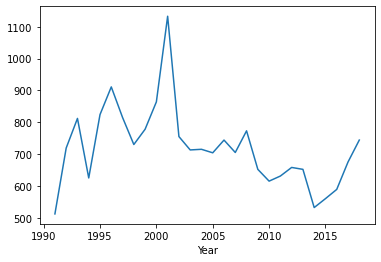

In [134]:
final_hate.groupby("Year").size().plot.line()

<AxesSubplot:xlabel='DATA_YEAR'>

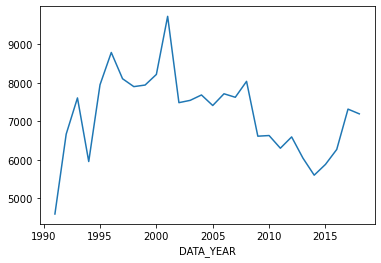

In [135]:
original_hate.groupby("DATA_YEAR").size().plot.line()

<AxesSubplot:>

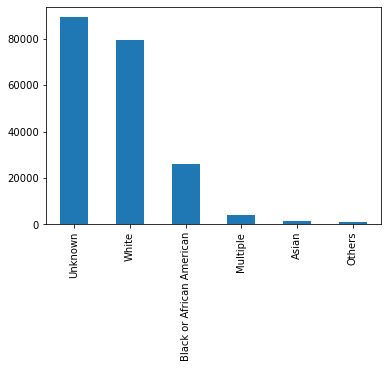

In [136]:
offense_race = original_hate.OFFENDER_RACE.value_counts()
offense_race.plot(kind="bar")

<AxesSubplot:>

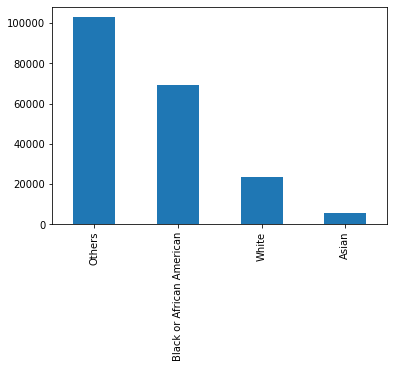

In [138]:
victims_race = original_hate.VICTIM_RACE.value_counts()
victims_race.plot(kind="bar")

<AxesSubplot:>

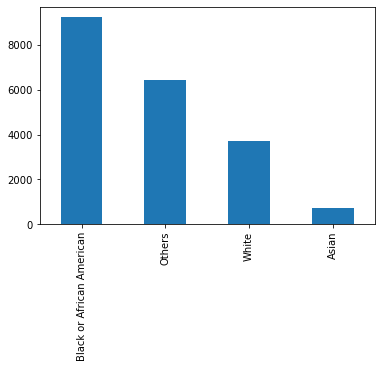

In [139]:
final_hate.Victim_race.value_counts().plot(kind="bar")

<AxesSubplot:>

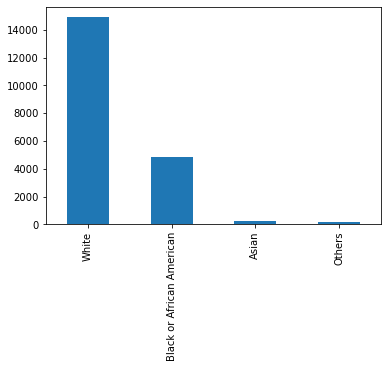

In [140]:
final_hate.Offender_race.value_counts().plot(kind="bar")

<AxesSubplot:xlabel='VICTIM_RACE'>

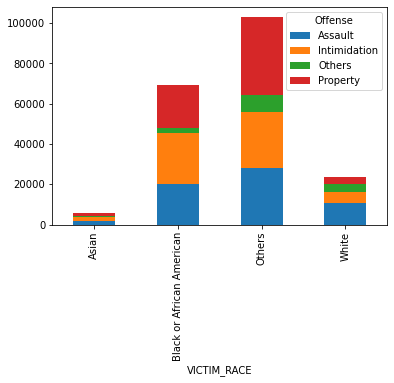

In [178]:
stacked_df = original_hate.groupby(["VICTIM_RACE", "Offense"]).size().reset_index()
stacked_df.pivot_table(values=0, index="VICTIM_RACE", columns='Offense', 
                       aggfunc='first').plot(kind = "bar", stacked=True)

<AxesSubplot:xlabel='Victim_race'>

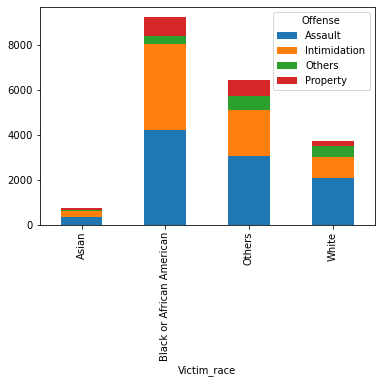

In [179]:
final_hate.groupby(["Victim_race", "Offense"]).size().reset_index().pivot_table(values=0, index="Victim_race", columns='Offense', 
                       aggfunc='first').plot(kind = "bar", stacked=True)

Victims race
Offense type
Offense race